# Praca domowa 6

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score, davies_bouldin_score
from sklearn.mixture import GaussianMixture
from mpl_toolkits.mplot3d import Axes3D

## Przygotowanie danych

In [41]:
data = pd.read_csv("..\\..\\clustering_R3.csv")
data.describe()

,X1,X2,X3
count,1000.000000,1000.000000,1000.000000
mean,240.181036,154.937365,5.454947
std,115.556334,41.964161,4.793973
min,38.516347,87.376621,0.125057
25%,148.801776,104.853322,1.806255
50%,231.754437,151.846118,3.430892
75%,350.277958,198.367658,8.287805
max,399.930758,213.917568,24.537806


Jak widać w podsumowaniu danych, kolumny X1, X2 i X3 różnią się rzędem wielkości, więc standaryzacja danych powinna znacznie ułatwić rozróżnianie klastrów.

In [42]:
data = pd.DataFrame(preprocessing.scale(data))
data.columns = ['X1', 'X2', 'X3']
data.describe()

,X1,X2,X3
count,1.000000e+03,1.000000e+03,1.000000e+03
mean,-2.953193e-17,4.618528e-17,-2.553513e-16
std,1.000500e+00,1.000500e+00,1.000500e+00
min,-1.746037e+00,-1.610769e+00,-1.112346e+00
25%,-7.911724e-01,-1.194093e+00,-7.614805e-01
50%,-7.295849e-02,-7.370082e-02,-4.224195e-01
75%,9.532321e-01,1.035456e+00,5.912165e-01
max,1.383132e+00,1.406193e+00,3.982585e+00


## Wizualizacja danych

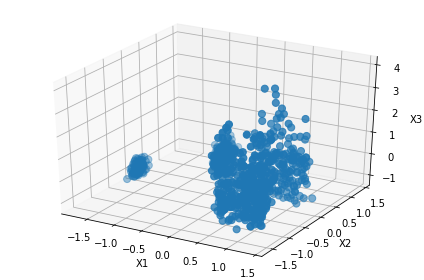

In [43]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data.X1, data.X2, data.X3, s=50)

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')

plt.tight_layout()
plt.show()

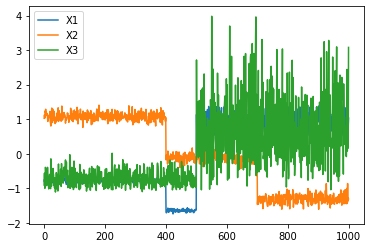

In [44]:
data.plot()

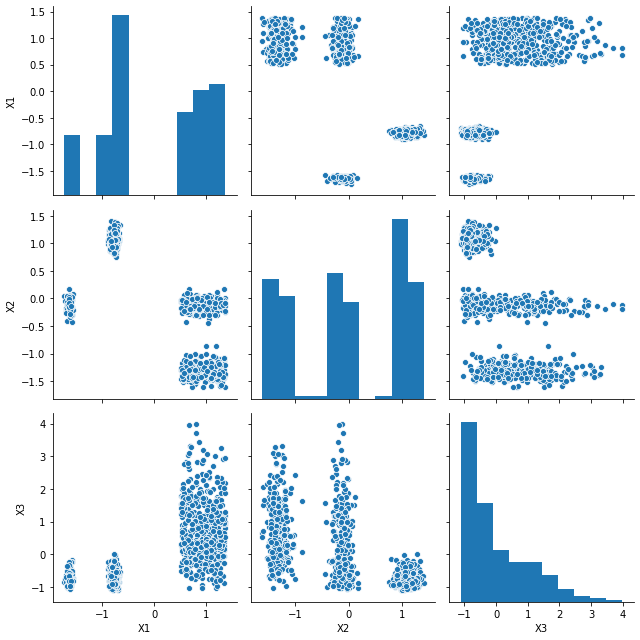

In [45]:
sns.pairplot(data, height=3)
plt.tight_layout()

Po przedstawieniu danych na wykresach widzimy, że dane ze zbioru clustering_R3 układają się w pewne naturalne, wyraźnie odzielone klastry. Do wykrycia tych klastrów posłużę się 3 algorytmami: KMeans, DBSCAN i GaussianMixture

## KMeans

In [46]:
labels_kmeans = []
sil_scores_kmeans = []
dbi_scores_kmeans = []
for k in range(2, 21):
    model_kmeans = KMeans(n_clusters = k)
    prediction_kmeans = model_kmeans.fit_predict(data)
    labels_kmeans.append(prediction_kmeans)
    
    sil_scores_kmeans.append(silhouette_score(data, prediction_kmeans))
    dbi_scores_kmeans.append(davies_bouldin_score(data, prediction_kmeans))

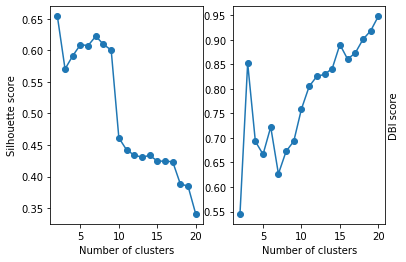

In [47]:
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.plot(range(2, 21), sil_scores_kmeans, '-o')
ax1.set_xlabel("Number of clusters")
ax1.set_ylabel("Silhouette score")

ax2.plot(range(2, 21), dbi_scores_kmeans, '-o')
ax2.set_xlabel("Number of clusters")
ax2.set_ylabel("DBI score")
ax2.yaxis.set_label_position("right")

plt.show()

In [72]:
[sil_scores_kmeans[0], dbi_scores_kmeans[0]]

[0.6538256076718254, 0.5452007126116644]

Z wykresów 2 miar wynika, że kmeans naturalnie rozdziela zbiór na 2 klastry. Spróbujmy je zwizualizować

In [50]:
model_kmeans = KMeans(n_clusters = 2)
labels_kmeans = model_kmeans.fit_predict(data)

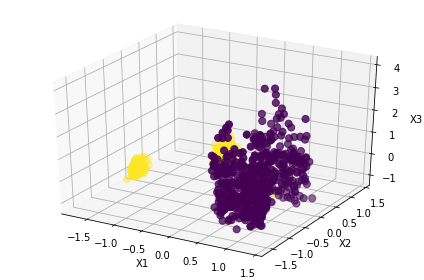

In [51]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data.X1, data.X2, data.X3, s=50, c = labels_kmeans)

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')

plt.tight_layout()
plt.show()

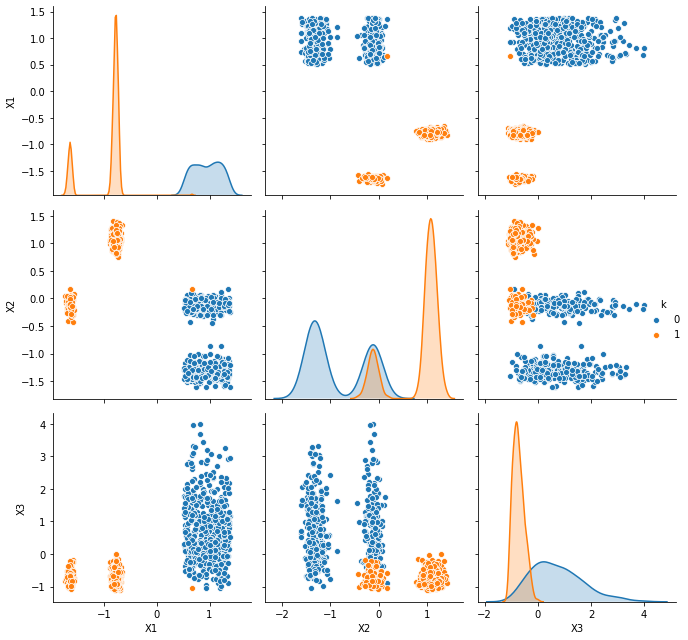

In [52]:
data['k'] = labels_kmeans
sns.pairplot(data, height=3, hue = 'k')
plt.tight_layout()

## DBSCAN

In [53]:
labels_dbscan = []
sil_scores_dbscan = []
dbi_scores_dbscan = []
for eps in np.arange(0.05, 1.05, 0.05):
    dbs = DBSCAN(eps)
    prediction_dbscan = dbs.fit_predict(data)
    labels_dbscan.append(prediction_dbscan)
    
    sil_scores_dbscan.append(silhouette_score(data, prediction_dbscan))
    dbi_scores_dbscan.append(davies_bouldin_score(data, prediction_dbscan))

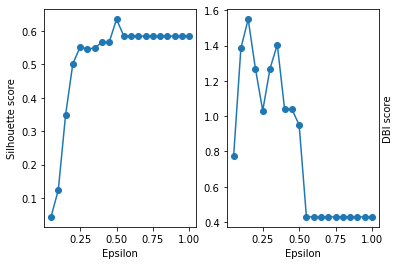

In [54]:
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.plot(np.arange(0.05, 1.05, 0.05), sil_scores_dbscan, '-o')
ax1.set_xlabel("Epsilon")
ax1.set_ylabel("Silhouette score")

ax2.plot(np.arange(0.05, 1.05, 0.05), dbi_scores_dbscan, '-o')
ax2.set_xlabel("Epsilon")
ax2.set_ylabel("DBI score")
ax2.yaxis.set_label_position("right")

plt.show()

In [71]:
[sil_scores_dbscan[10], dbi_scores_dbscan[10]]

[0.5842689202423458, 0.42912417330746316]

Ze wstępnej analizy parametru epsilon w algorytmie DBSCAN domyślamy się, że najlepszym parametrem będzie eps = 0.55. Ponieważ parametr epsilon jest bardzo czuły i znaczący dla wyniku algorytmu, sprawdzę jak zachowuje się w okolicach wyniku 0.5.

In [60]:
labels_dbscan_extra = []
sil_scores_dbscan_extra = []
dbi_scores_dbscan_extra = []
for eps in np.arange(0.45, 0.55, 0.01):
    dbs_extra = DBSCAN(eps)
    prediction_dbscan_extra = dbs_extra.fit_predict(data)
    labels_dbscan_extra.append(prediction_dbscan_extra)
    
    sil_scores_dbscan_extra.append(silhouette_score(data, prediction_dbscan_extra))
    dbi_scores_dbscan_extra.append(davies_bouldin_score(data, prediction_dbscan_extra))

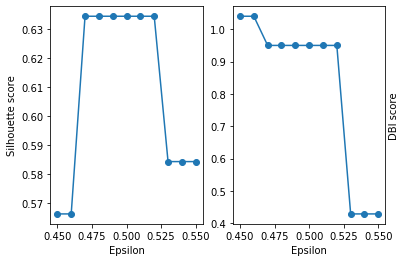

In [61]:
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.plot(np.arange(0.45, 0.55, 0.01), sil_scores_dbscan_extra, '-o')
ax1.set_xlabel("Epsilon")
ax1.set_ylabel("Silhouette score")

ax2.plot(np.arange(0.45, 0.55, 0.01), dbi_scores_dbscan_extra, '-o')
ax2.set_xlabel("Epsilon")
ax2.set_ylabel("DBI score")
ax2.yaxis.set_label_position("right")

plt.show()

Moje przypuszczenia się potwierdziły. Epsilon równy 0.55 daje najlepsze wyniki miar Silhouette i DBI.

In [62]:
dbs = DBSCAN(eps=0.55)
labels_dbscan = dbs.fit_predict(data)

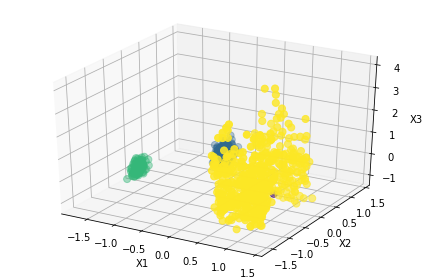

In [63]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data.X1, data.X2, data.X3, s=50, c = labels_dbscan)

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')

plt.tight_layout()
plt.show()

C:\Users\jwisn\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\jwisn\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\jwisn\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


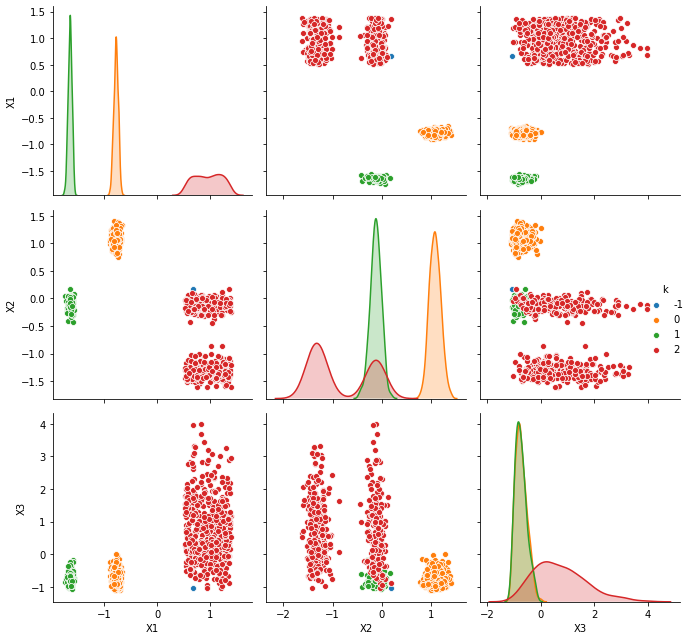

In [64]:
data['k'] = labels_dbscan
sns.pairplot(data, height=3, hue = 'k')
plt.tight_layout()

Tak prezentują się klastry utworzone przy pomocy tego algorytmu. W przeciwieństwie do algorytmu KMeans, DBSCAN dzieli zbiór na 3 klastry.

## GaussianMixture

In [65]:
labels_gmm = []
sil_scores_gmm = []
dbi_scores_gmm = []
for k in range(2, 21):
    gmm = GaussianMixture(n_components=k, covariance_type='full')
    prediction_gmm = gmm.fit_predict(data)
    labels_gmm.append(prediction_gmm)
    
    sil_scores_gmm.append(silhouette_score(data, prediction_gmm))
    dbi_scores_gmm.append(davies_bouldin_score(data, prediction_gmm))

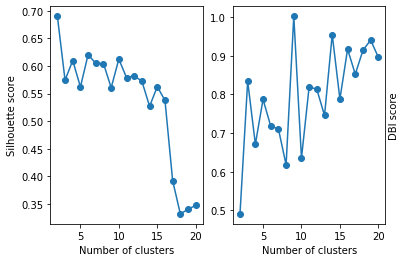

In [66]:
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.plot(range(2, 21), sil_scores_gmm, '-o')
ax1.set_xlabel("Number of clusters")
ax1.set_ylabel("Silhouette score")

ax2.plot(range(2, 21), dbi_scores_gmm, '-o')
ax2.set_xlabel("Number of clusters")
ax2.set_ylabel("DBI score")
ax2.yaxis.set_label_position("right")

plt.show()

In [73]:
[sil_scores_gmm[0], dbi_scores_gmm[0]]

[0.6900040182763741, 0.49059058769611696]

Wyniki tego algorytmu, podobnie jak w przypadku KMeans, proponują podział zbioru na 2 klastry.

In [67]:
gmm = GaussianMixture(n_components=2, covariance_type='full')
labels_gmm = gmm.fit_predict(data)

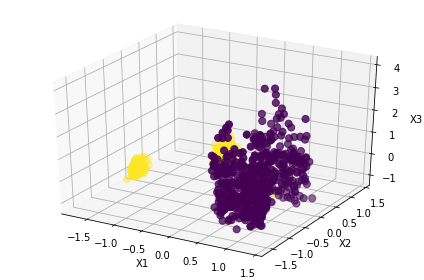

In [68]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data.X1, data.X2, data.X3, s=50, c = labels_gmm)

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')

plt.tight_layout()
plt.show()

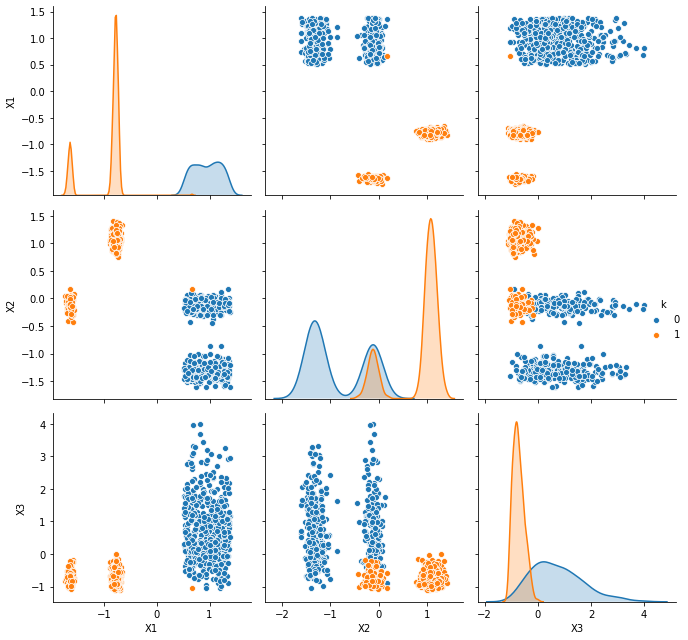

In [69]:
data['k'] = labels_gmm
sns.pairplot(data, height=3, hue = 'k')
plt.tight_layout()

Po wizualizacji wyniku, okazuje się, że GMM podzielił zbiór w bardzo podobny sposób co KMeans.

## Wnioski

Algorytmy KMeans oraz GMM zachowały się bardzo podobnie, przy czym GMM dał delikatnie lepsze wyniki w dla obu miar. Dlatego w podsumowaniu końcowym zajmę się porównywaniem algorytmów GMM i DBSCAN.
- GMM podzielił zbiór na 2 klastry, a DBSCAN na 3
- GMM osiągnął lepszy wynik miary silhouette
- DBSCAN osiągnął lepszy wynik miary DBI

Moim zdaniem DBSCAN pokazał ciekawsze kalstry od GMM, co oczywiście nie znaczy, że poradził sobie lepiej ze zbiorem.